In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
import time
import os
import copy

In [2]:
import os

# Path to the dataset
dataset_path = "/kaggle/input/new-plant-diseases-dataset/"

# Find the train directory
train_dir = None
for dirname, _, filenames in os.walk(dataset_path):
    if 'train' in dirname:
        train_dir = dirname
        break  # Stop after finding the first train directory

if train_dir:
    print(f"Training directory found: {train_dir}")
else:
    print("No training directory found.")

Training directory found: /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train


### Data Preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 70295 files belonging to 38 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


### Model Building

In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn = tf.keras.Sequential()

# Add Input layer
cnn.add(tf.keras.Input(shape=(128, 128, 3)))

# Add convolutional layers
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [15]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Training Data

In [16]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [17]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


I0000 00:00:1731948653.547521     103 service.cc:145] XLA service 0x79f774005560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731948653.547589     103 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731948653.547596     103 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


   3/2197 ━━━━━━━━━━━━━━━━━━━━ 2:19 63ms/step - accuracy: 0.0486 - loss: 4.3292 

I0000 00:00:1731948665.833209     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 150s 61ms/step - accuracy: 0.3889 - loss: 2.1666 - val_accuracy: 0.8408 - val_loss: 0.4990
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 113s 51ms/step - accuracy: 0.8323 - loss: 0.5337 - val_accuracy: 0.9175 - val_loss: 0.2618
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 112s 51ms/step - accuracy: 0.9088 - loss: 0.2873 - val_accuracy: 0.9232 - val_loss: 0.2441
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 113s 51ms/step - accuracy: 0.9359 - loss: 0.1975 - val_accuracy: 0.9517 - val_loss: 0.1499
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 112s 51ms/step - accuracy: 0.9508 - loss: 0.1527 - val_accuracy: 0.9508 - val_loss: 0.1559
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 113s 51ms/step - accuracy: 0.9630 - loss: 0.1145 - val_accuracy: 0.9534 - val_loss: 0.1435
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 112s 51ms/step - accuracy: 0.9707 - loss: 0.0880 - val_accuracy: 0.9627 - val_loss: 0.1256
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 113s 51ms/step - accuracy: 0.9745 - lo

### Evaluating Model

In [19]:
#TRAINING SET ACCURACY
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - accuracy: 0.9796 - loss: 0.0596
Training accuracy: 0.9806671738624573


In [20]:
#VALIDATION SET ACCURACY
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9531 - loss: 0.1593
Validation accuracy: 0.9507739543914795


In [21]:
#Saving Model
cnn.save('trained_plant_disease_model.keras')

In [22]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5883491039276123,
  0.8553239703178406,
  0.9166796803474426,
  0.9402090907096863,
  0.9546625018119812,
  0.9645067453384399,
  0.9713919758796692,
  0.9757877588272095,
  0.9783483743667603,
  0.982032835483551],
 'loss': [1.3931530714035034,
  0.45552563667297363,
  0.26155200600624084,
  0.18168018758296967,
  0.13865892589092255,
  0.10848270356655121,
  0.08636333793401718,
  0.07509227097034454,
  0.06608735024929047,
  0.056829676032066345],
 'val_accuracy': [0.8408263325691223,
  0.9175392389297485,
  0.9231732487678528,
  0.9517413973808289,
  0.95083087682724,
  0.9534486532211304,
  0.9627248048782349,
  0.9453676342964172,
  0.9465057849884033,
  0.9507739543914795],
 'val_loss': [0.49896374344825745,
  0.2617686092853546,
  0.24408751726150513,
  0.14993837475776672,
  0.15585759282112122,
  0.1434672474861145,
  0.12561529874801636,
  0.1906605064868927,
  0.19780462980270386,
  0.16989484429359436]}

In [23]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [24]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


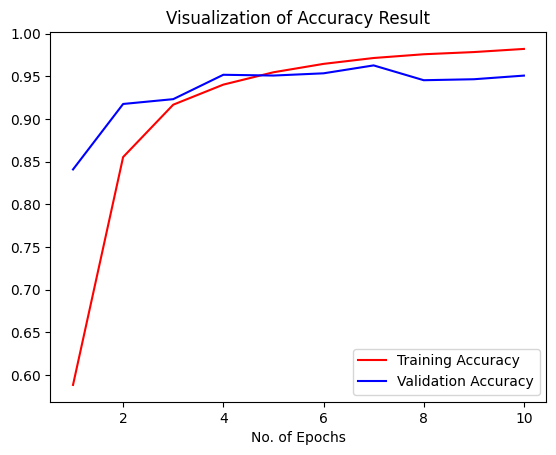

In [25]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [26]:
class_name = validation_set.class_names

In [27]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [28]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step


In [29]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [30]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)
classification_report(Y_true,predicted_categories,target_names=class_name)

'                                                    precision    recall  f1-score   support\n\n                                Apple___Apple_scab       0.99      0.91      0.95       504\n                                 Apple___Black_rot       0.93      0.99      0.96       497\n                          Apple___Cedar_apple_rust       0.96      0.98      0.97       440\n                                   Apple___healthy       0.95      0.93      0.94       502\n                               Blueberry___healthy       0.98      0.95      0.96       454\n          Cherry_(including_sour)___Powdery_mildew       0.98      0.96      0.97       421\n                 Cherry_(including_sour)___healthy       0.98      0.99      0.98       456\nCorn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.94      0.92       410\n                       Corn_(maize)___Common_rust_       0.98      0.99      0.99       477\n               Corn_(maize)___Northern_Leaf_Blight       0.96      

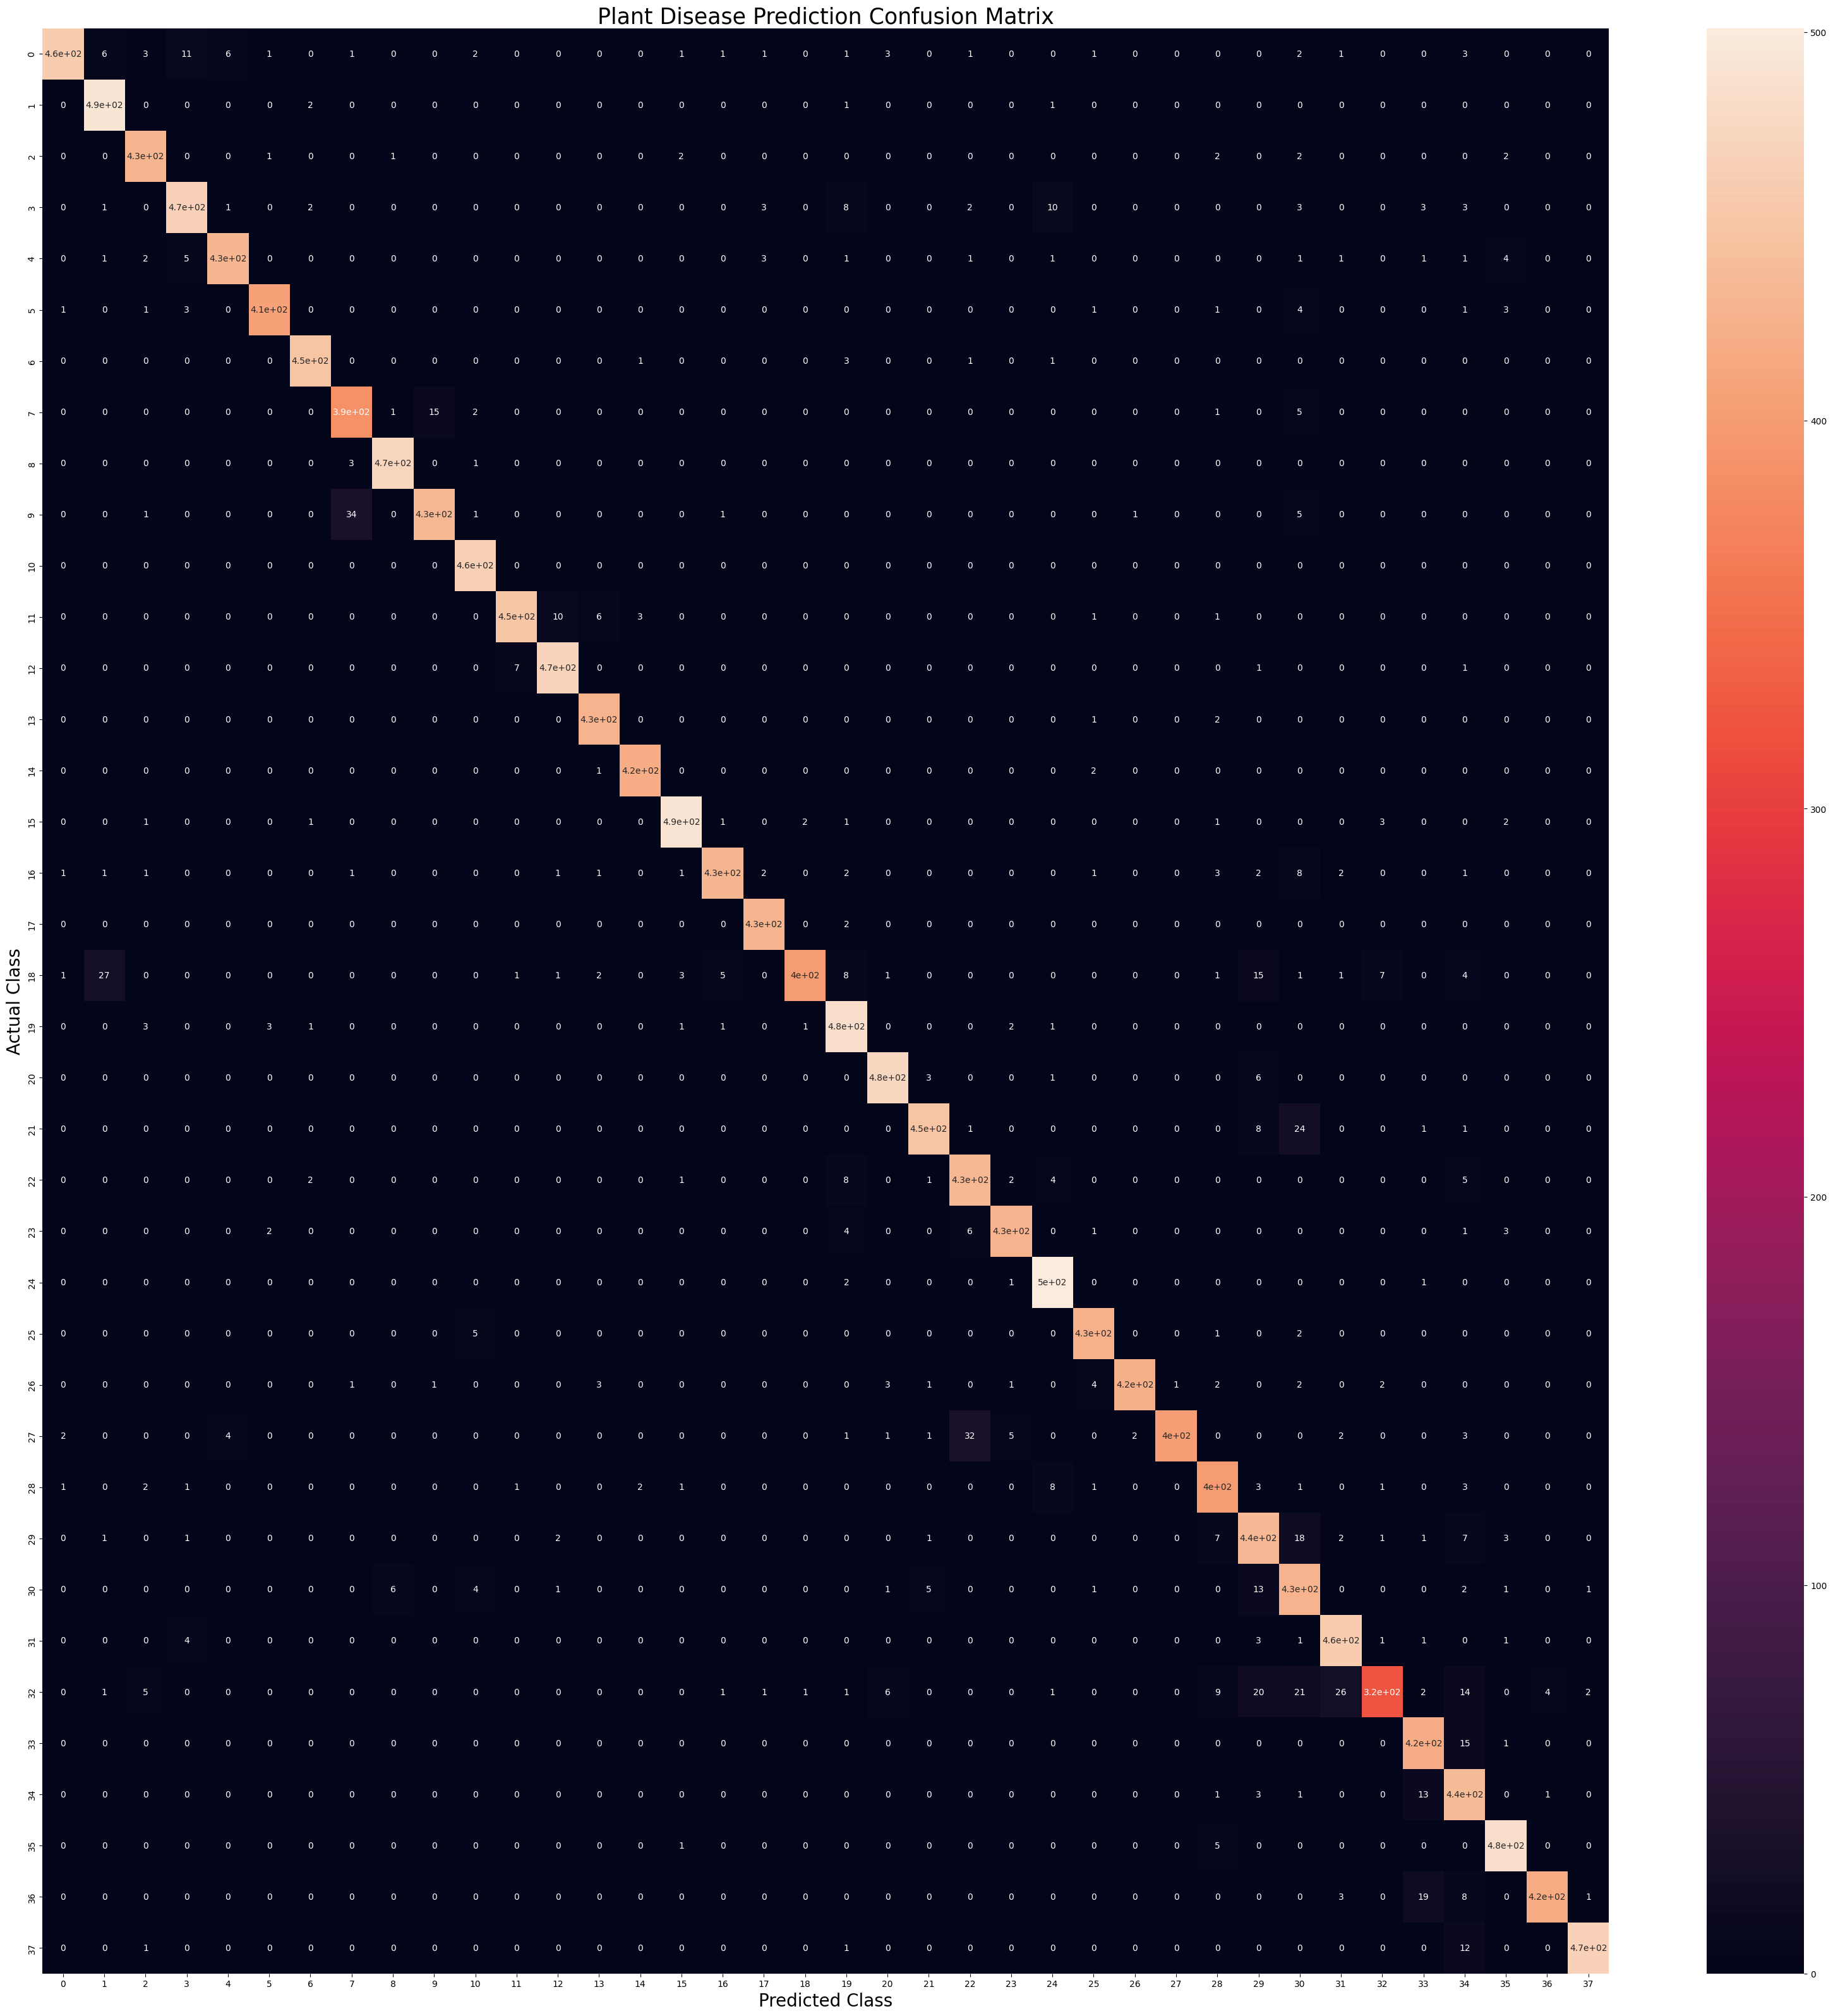

In [34]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()